# Week 1 handin - by Sebastian Bentley (cph-sb287)

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


## 02 Status

A possible solution is made for (almost) every task, uncluding the extra tasks.

I did not filly understand the "Extra" assignment in part 1

In Ex2 Exceptions, I merely printed the error message, since I thought it was a bit overkill to write a small message to a .csv file, after using read and write of .csv files in Ex1  extensively.

Look in file: "modules/week3/classes.py" to see more of the code solutions, for Ex1 

# 03 Solution part 1

In [1]:
# Create 3 classes: Student, DataSheet and Course
# A student has a data_sheet and a data_sheet has multiple courses in particular order
# Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
# In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
from modules.week3 import classes as ex1

c1 = ex1.Course('JavaScript', 'Zoom-B', 'Lars', 20, 12)
c2 = ex1.Course('Python', 'Zoom-D', 'Thomas', 5, 4)
data_sheet = ex1.DataSheet([c1, c2])
student = ex1.Student("Jens", "Male", data_sheet, "img.png")


#In DataSheet create a method to get_grades_as_list()
print('Grades: ' + str(data_sheet.get_grades_as_list()))

#In student create a method: get_avg_grade()
print('Avg_grade: ' + str(student.get_avg_grade()))




Grades: [12, 4]
Avg_grade: 8.0


In [ ]:
# Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
# Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
from modules.week3 import classes as ex1

ex1.generate_students(5)



Name: Sven, url: Img.png, average grade: 6.333333333333333
Name: Maria, url: Img.png, average grade: 7.666666666666667
Name: Børge, url: Img.png, average grade: 10.333333333333334
Name: Sofia, url: Img.png, average grade: 7.0
Name: Helene, url: Img.png, average grade: 8.666666666666666


<IPython.core.display.Javascript object>


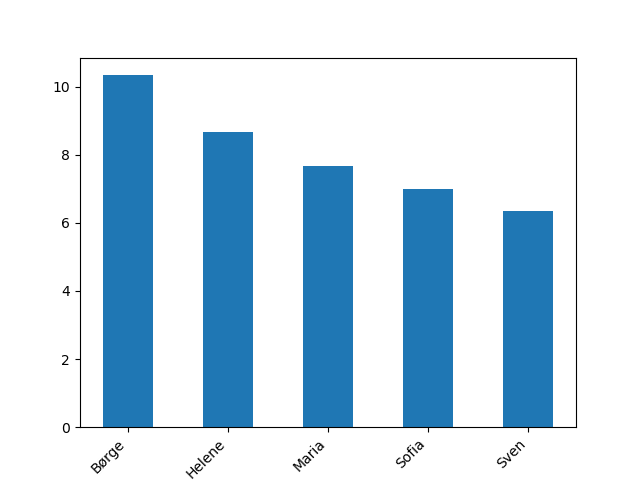

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

In [2]:
from modules.week3 import classes as ex1
%matplotlib notebook
import matplotlib.pyplot as plt

#Read student data into a list of Students from a csv file:
lst_students = ex1.get_students_from_csv()

#loop through the list and print each student with name, img_url and avg_grade.
for s in lst_students:
    print('Name: ' + s.name + ', url: ' + s.image_url +', average grade: ' + str(s.get_avg_grade()))

#sort the list by avg_grade
sorted_students = sorted(ex1.get_students_from_csv(), key=lambda x: x.get_avg_grade(), reverse=True)

#create a bar chart with student_name on x and avg_grade on y-axis
names = [student.name for student in sorted_students]
avg_grades= [student.get_avg_grade() for student in sorted_students]

plt.bar(names, avg_grades, width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')



In [3]:
# Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
from modules.week3 import classes as ex1
%matplotlib notebook
import matplotlib.pyplot as plt

print(ex1.get_students_from_csv()[0].etcs_progression())


26.666666666666668


<IPython.core.display.Javascript object>


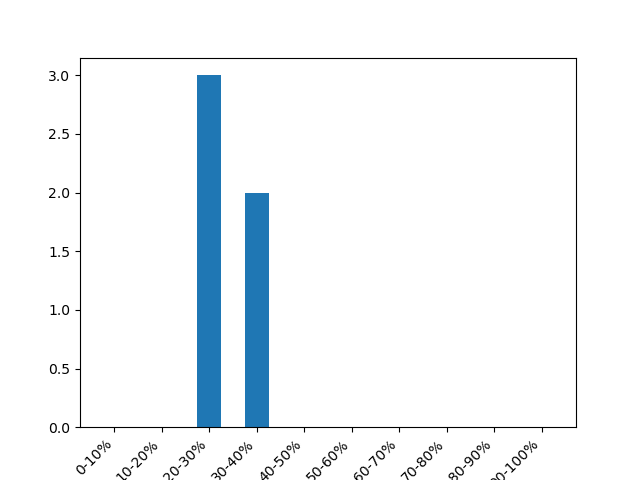

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

In [4]:
#Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

from modules.week3 import classes as ex1
%matplotlib notebook
import matplotlib.pyplot as plt


categories=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%" ]
students=[0,0,0,0,0,0,0,0,0,0]

lst_students= ex1.get_students_from_csv()

for idx, val in enumerate(lst_students):
    if(val.etcs_progression() < 10):
        students[0] += 1
    elif (val.etcs_progression() < 20):
        students[1] += 1
    elif (val.etcs_progression() < 30):
        students[2] += 1
    elif (val.etcs_progression() < 40):
        students[3] += 1
    elif (val.etcs_progression() < 50):
        students[4] += 1
    elif (val.etcs_progression() < 60):
        students[5] += 1
    elif (val.etcs_progression() < 70):
        students[6] += 1
    elif (val.etcs_progression() < 80):
        students[7] += 1
    elif (val.etcs_progression() < 90):
        students[8] += 1
    elif (val.etcs_progression() < 100):
        students[9] += 1
   
        


plt.bar(categories, students, width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')




# 04 Solution part 2

In [5]:
#Create a function that can take a list of students and return the 3 students closest to completing their study.
from modules.week3 import classes as ex1
from modules.week3 import exceptions as ex2

print(ex2.closest_to_complete(ex1.get_students_from_csv()))


# If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
c1 = ex1.Course('JavaScript', 'Zoom-B', 'Lars', 20, 12)
c2 = ex1.Course('Python', 'Zoom-D', 'Thomas', 5, 4)
data_sheet = ex1.DataSheet([c1, c2])
student = ex1.Student("Jens", "Male", data_sheet, "img.png")
fail_lst = [student]

print(ex2.closest_to_complete(fail_lst))



[<modules.week3.classes.Student object at 0x7f82e1612490>, <modules.week3.classes.Student object at 0x7f82e1612810>, <modules.week3.classes.Student object at 0x7f82e1611990>]


NotEnoughStudentsException: 

In [6]:
#Create another function that can create a csv file with 3 students closest to completion
#If an exception is raised write an appropriate message to the file
from modules.week3 import classes as ex1
from modules.week3 import exceptions as ex2

c1 = ex1.Course('JavaScript', 'Zoom-B', 'Lars', 20, 12)
c2 = ex1.Course('Python', 'Zoom-D', 'Thomas', 5, 4)
data_sheet = ex1.DataSheet([c1, c2])
student = ex1.Student("Jens", "Male", data_sheet, "img.png")
fail_lst = [student]

ex2.closest_to_csv(fail_lst)

Not enough students!


# 05 Solution part 3

<IPython.core.display.Javascript object>


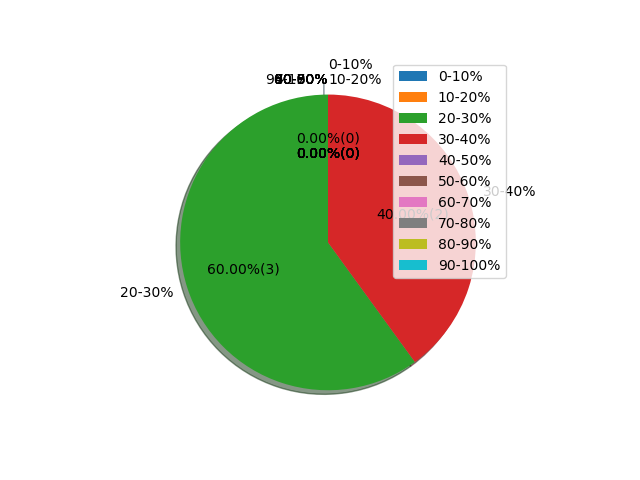

In [7]:
#Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
from modules.week3 import classes as ex1
%matplotlib notebook
import matplotlib.pyplot as plt

def generate_pie_chart():
    students=[0,0,0,0,0,0,0,0,0,0]

    lst_students= ex1.get_students_from_csv()

    for idx, val in enumerate(lst_students):
        if(val.etcs_progression() < 10):
            students[0] += 1
        elif (val.etcs_progression() < 20):
            students[1] += 1
        elif (val.etcs_progression() < 30):
            students[2] += 1
        elif (val.etcs_progression() < 40):
            students[3] += 1
        elif (val.etcs_progression() < 50):
            students[4] += 1
        elif (val.etcs_progression() < 60):
            students[5] += 1
        elif (val.etcs_progression() < 70):
            students[6] += 1
        elif (val.etcs_progression() < 80):
            students[7] += 1
        elif (val.etcs_progression() < 90):
            students[8] += 1
        elif (val.etcs_progression() < 100):
            students[9] += 1


    # Pie chart
    data = {'0-10%': students[0], '10-20%': students[1], '20-30%': students[2], '30-40%': students[3], '40-50%': students[4], '50-60%': students[5], '60-70%': students[6], '70-80%': students[7], '80-90%': students[8], '90-100%': students[9] }

    explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0) # offset second slice
    fig1, ax1 = plt.subplots() # first returned is the containing figure (fig1), then the subplot Axe object(s) (ax1)
    ax1.pie(data.values(), labels=data.keys(), explode=explode, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(data.values())), 
        #autopct=make_autopct(data.values()), 
        #autopct='%.1f', 
        # autopct= a format string like '%1.2f%%' for showing pct sign and 2 decimals
        shadow=True, startangle=90)
    ax1.set_aspect('equal')
    ax1.legend(data.keys(), loc='upper right') # use instead of labels in ax1.pie(...)
    #ax1.axis('equal')  
    #plt.tight_layout()
    plt.show()

generate_pie_chart()



<IPython.core.display.Javascript object>


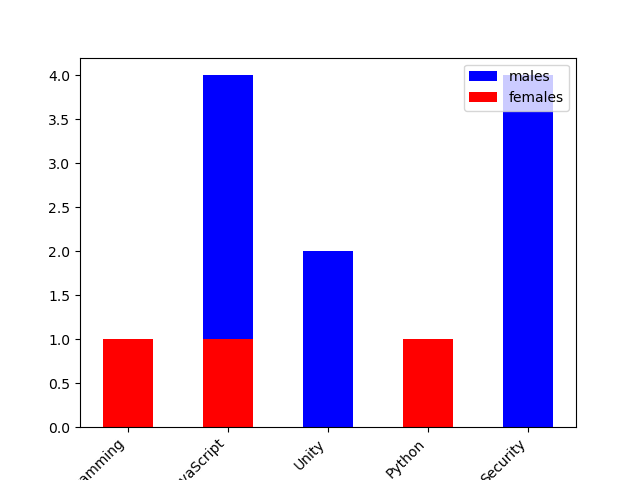

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

In [9]:
#create a function that can take a list of students and show how many students have taken each course (bar chart)
#create a method on student that can return a list of courses
#make the figure show males and females in different colors for each course (display 2 datasets in same figure)

from modules.week3 import classes as ex1
%matplotlib notebook
import matplotlib.pyplot as plt


categories=["Functional Programming", "JavaScript", "Unity", "Python", "Security"]
male_students=[0,0,0,0,0]
female_students=[0,0,0,0,0]

lst_students= ex1.get_students_from_csv()

for idx, val in enumerate(lst_students):
    #create a method on student that can return a list of courses
    for res in val.my_courses():
        if(res.name == "Functional Programming"):
            if(val.gender == "Male"):
                male_students[0] += 1
            elif(val.gender == "Female"):
                female_students[0] += 1    
        elif(res.name == "JavaScript"):
            if(val.gender == "Male"):
                male_students[1] += 1
            elif(val.gender == "Female"):
                female_students[1] += 1
            
            
        elif(res.name == "Unity"):
            
            if(val.gender == "Male"):
                male_students[2] += 1
            elif(val.gender == "Female"):
                female_students[2] += 1
            
            
        elif(res.name == "Python"):
            
            if(val.gender == "Male"):
                male_students[3] += 1
            elif(val.gender == "Female"):
                female_students[3] += 1
            
        elif(res.name == "Security"):
            
            
            if(val.gender == "Male"):
                male_students[4] += 1
            elif(val.gender == "Female"):
                female_students[4] += 1

        


p1 = plt.bar(categories, male_students, width=0.5, align='center', color='blue')
p2 = plt.bar(categories, female_students, width=0.5, align='center', color='red')
plt.legend([p1,p2], ['males', 'females'], loc=1)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')